In [1]:
## Add our modlules to the system path
import sys
sys.path.append("../src/")

## Import our modules for preprocessing, chunking, and vectorizing
from data_processing import preprocess, chunk, vectorize

In [2]:
%%time
import polars as pl
## Import the raw data
DATA_RAW = pl.read_parquet("../temp_data/raw_data_subset_gm.parquet")[0:1000]

CPU times: user 30 ms, sys: 10.5 ms, total: 40.5 ms
Wall time: 29.1 ms


In [3]:
%%time
## Apply preprocssing
data_preprocessed = preprocess.preprocess_data(DATA_RAW=DATA_RAW)

Dropping 3 rows with reddit_text=='[deleted]'
Dropping 2 rows with reddit_text=='[removed]'
Dropping 1 rows with reddit_text containing:'This has been removed for breaking the sub rule of'
Dropping 5 rows with reddit_text==''
CPU times: user 2.57 ms, sys: 8.06 ms, total: 10.6 ms
Wall time: 2.19 ms


In [4]:
%%time
## Apply chunking
data_chunked = chunk.chunk_preprocessed_data(
    data_preprocessed=data_preprocessed, 
    chunk_size=512, 
    chunk_overlap_pct=.2)

CPU times: user 14.1 ms, sys: 4.56 ms, total: 18.7 ms
Wall time: 15.5 ms


Model's maximum sequence length : 512
Max sequence length observed after tokenizing chunked text: 136


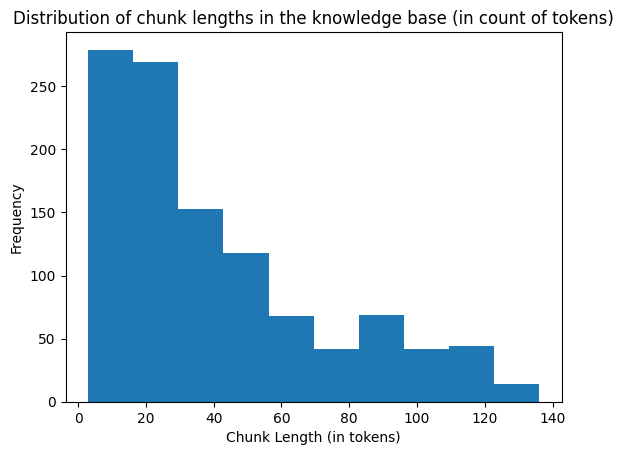

CPU times: user 1.97 s, sys: 2.92 s, total: 4.89 s
Wall time: 1.24 s


In [5]:
%%time
## Verify that chunk lengths will be within model limits after tokenization
vectorize.check_token_lengths(data_chunked=data_chunked,
                              model="thenlper/gte-base")

In [6]:
%%time
from langchain_community.embeddings import HuggingFaceEmbeddings
model = HuggingFaceEmbeddings(model_name="thenlper/gte-base")

## Vectorize the chunked data
data_vectorized = vectorize.vectorize_chunked_data(data_chunked=data_chunked,
                                                   embeddings=model)

CPU times: user 3.83 s, sys: 2.26 s, total: 6.1 s
Wall time: 4.47 s


In [7]:
## Peek at the results
data_vectorized.head(3)

aware_post_type,aware_created_ts,reddit_id,reddit_name,reddit_created_utc,reddit_author,reddit_text,reddit_permalink,reddit_title,reddit_url,reddit_subreddit,reddit_link_id,reddit_parent_id,reddit_submission,text_chunk,vector
str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,list[f64]
"""submission""","""2024-01-05T10:…","""18z96ud""","""t3_18z96ud""",1704467742,"""Jmill2000""","""So I know GM m…","""/r/GeneralMoto…","""References""","""https://www.re…","""GeneralMotors""",null,null,null,"""So I know GM m…","[0.011797, 0.035773, … 0.036507]"
"""submission""","""2024-01-05T10:…","""18z96ud""","""t3_18z96ud""",1704467742,"""Jmill2000""","""So I know GM m…","""/r/GeneralMoto…","""References""","""https://www.re…","""GeneralMotors""",null,null,null,"""I think that’s…","[0.001009, 0.011987, … 0.012729]"
"""comment""","""2024-01-05T10:…","""kgfznkx""","""t1_kgfznkx""",1704468972,"""warwolf0""","""Yea, that’s a …","""/r/GeneralMoto…",null,null,"""GeneralMotors""","""t3_18z96ud""","""t3_18z96ud""","""18z96ud""","""Yea, that’s a …","[0.043242, 0.019973, … -0.006569]"
